# Data Studios Project 1 data analysis

In [6]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import selenium
from selenium import webdriver
driver = webdriver.Chrome()
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import numpy as np
from numpy import array
import re
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
%matplotlib inline
from shapely.geometry import Polygon
np.nan
import matplotlib.pyplot as plt
import numpy as np






In [12]:
df_schools1 = pd.read_csv('2010_11.csv')
df_schools2 = pd.read_csv('2011_12.csv')
df_schools3 = pd.read_csv('2012_13.csv')
df_schools4 = pd.read_csv('2013_14.csv')
df_schools5 = pd.read_csv('2014_15.csv')
df_schools6 = pd.read_csv('2015_16.csv')







In [13]:
df_schools2['MMR2 doses(%) 2011/12'] = df_schools2['MMR2 doses(%) 2011/12'].str.replace('.*§', 'NaN')
df_schools2['MMR2 doses(%) 2011/12'] = df_schools2['MMR2 doses(%) 2011/12'].str.replace('.*†', 'NaN')
df_schools2.drop(df_schools2.index[44], inplace=True)
df_schools2['State/Area'] = df_schools2['State/Area'].str.replace('New York State', 'New York')
df_schools2 = df_schools2.reset_index(drop=True)



In [14]:
df_schools3['MMR2 doses(%) 2012/13'] = df_schools3['MMR2 doses(%) 2012/13'].str.replace('≥', '')
df_schools3['MMR2 doses(%) 2012/13'] = df_schools3['MMR2 doses(%) 2012/13'].str.replace('.*†', 'NaN')
df_schools3['MMR2 doses(%) 2012/13'] = df_schools3['MMR2 doses(%) 2012/13'].str.replace('\(', '')
df_schools3['MMR2 doses(%) 2012/13'] = df_schools3['MMR2 doses(%) 2012/13'].str.replace('\)', '')
df_schools3['MMR2 doses(%) 2012/13'] = df_schools3['MMR2 doses(%) 2012/13'].str.replace('§', '')
df_schools3['State/Area'] = df_schools3['State/Area'].str.replace('*', '')
df_schools3.drop(df_schools3.index[44], inplace=True)
df_schools3 = df_schools3.reset_index(drop=True)


In [15]:
df_schools4['State/Area'] = df_schools4['State/Area'].str.replace('\§', '')
df_schools4['State/Area'] = df_schools4['State/Area'].str.replace('\†', '')
df_schools4['State/Area'] = df_schools4['State/Area'].str.replace('\¶', '')
df_schools4['State/Area'] = df_schools4['State/Area'].str.replace('\**', '')



df_schools4['MMR2 doses(%) 2013/14'] = df_schools4['MMR2 doses(%) 2013/14'].str.replace('\≥', '')
df_schools4.set_value(43, 'State/Area', 'Texas')

df_schools4.drop(df_schools4.index[44], inplace=True)
df_schools4 = df_schools4.reset_index(drop=True)





In [18]:
df_schools5 = df_schools5.sort_values('State/Area')

df_schools5['State/Area'] = df_schools5['State/Area'].str.replace('\§', '')
df_schools5['State/Area'] = df_schools5['State/Area'].str.replace('\†', '')
df_schools5['State/Area'] = df_schools5['State/Area'].str.replace('\¶', '')
df_schools5['State/Area'] = df_schools5['State/Area'].str.replace('\**', '')

df_schools5['MMR2 doses(%) 2014/15'] = df_schools5['MMR2 doses(%) 2014/15'].str.replace('≥', '')
df_schools5.set_value(25, 'State/Area', 'New York')


df_schools5.set_value(35, 'State/Area', 'Texas')
df_schools5.set_value(37, 'State/Area', 'Oregon')


# df_schools5.drop(df_schools5.index[44], inplace=True)


df_schools5 = df_schools5.reset_index(drop=True)


In [19]:
df_schools6['State/Area'] = df_schools6['State/Area'].str.replace('\§', '')
df_schools6['State/Area'] = df_schools6['State/Area'].str.replace('\†', '')
df_schools6['State/Area'] = df_schools6['State/Area'].str.replace('\¶', '')
df_schools6['State/Area'] = df_schools6['State/Area'].str.replace('\*', '')
df_schools6['State/Area'] = df_schools6['State/Area'].str.replace('\,', '')



df_schools6['MMR2 doses(%) 2015/16'] = df_schools6['MMR2 doses(%) 2015/16'].str.replace('≥', '')
df_schools6.set_value(32, 'State/Area', 'New York')
df_schools6.set_value(44, 'State/Area', 'Texas')



df_schools6.drop(df_schools6.index[45], inplace=True)
df_schools6.drop(df_schools6.index[33], inplace=True)
df_schools6.drop(df_schools6.index[51:], inplace=True)

df_schools6 = df_schools6.reset_index(drop=True)



#testdf_schools6: del row 45, 33


In [20]:
df_schools_complete = df_schools1.merge(df_schools2, on='State/Area', how='left')
df_schools_complete = df_schools_complete.merge(df_schools3, on='State/Area', how='left')
df_schools_complete = df_schools_complete.merge(df_schools4, on='State/Area', how='left')
df_schools_complete = df_schools_complete.merge(df_schools5, on='State/Area', how='left')
df_schools_complete = df_schools_complete.merge(df_schools6, on='State/Area', how='left')

In [22]:
df_oubreaks = pd.read_excel('Source_data_for_CFR_vaccine_map - Sheet1.xlsx')

In [23]:
df_oubreaks.Continent.value_counts()

North America    449
Asia             426
Africa           274
Europe           271
Australia        120
South America     33
Asia              10
Europe             1
Australia          1
Africa             1
Oceania            1
Name: Continent, dtype: int64

In [24]:
df_outbreaks_USA = df_oubreaks[df_oubreaks['Location'].str.contains('U.S.')]

In [25]:
df_outbreaks_USA.groupby('Year')['Cases'].sum()

Year
2008       99
2009      124
2010    11390
2011     1420
2012    17725
2013    22986
2014    15686
2015      909
2016     9821
2017     5291
Name: Cases, dtype: int64

In [26]:
df_outbreaks_USA.Location = df_outbreaks_USA.Location.str.extract(r'(\((.*)\))', expand=True)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
df_outbreaks_USA.Location = df_outbreaks_USA.Location.str.replace(r',.*', '')

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [28]:
df_outbreaks_USA.Location = df_outbreaks_USA.Location.str.replace(r'\(|\)|\,', '')

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
df_outbreaks_USA.to_csv("df_outbreaks_USA.csv") 

In [31]:
df_outbreaks_USA3 = pd.read_csv('Untitled spreadsheet - Sheet1.csv')

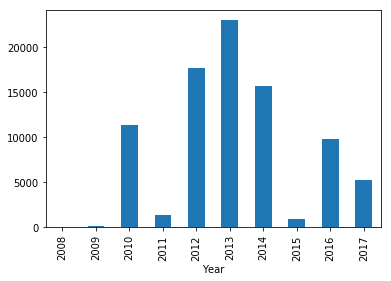

In [32]:
df_outbreaks_USA.groupby('Year')['Cases'].sum().plot(kind='Bar')

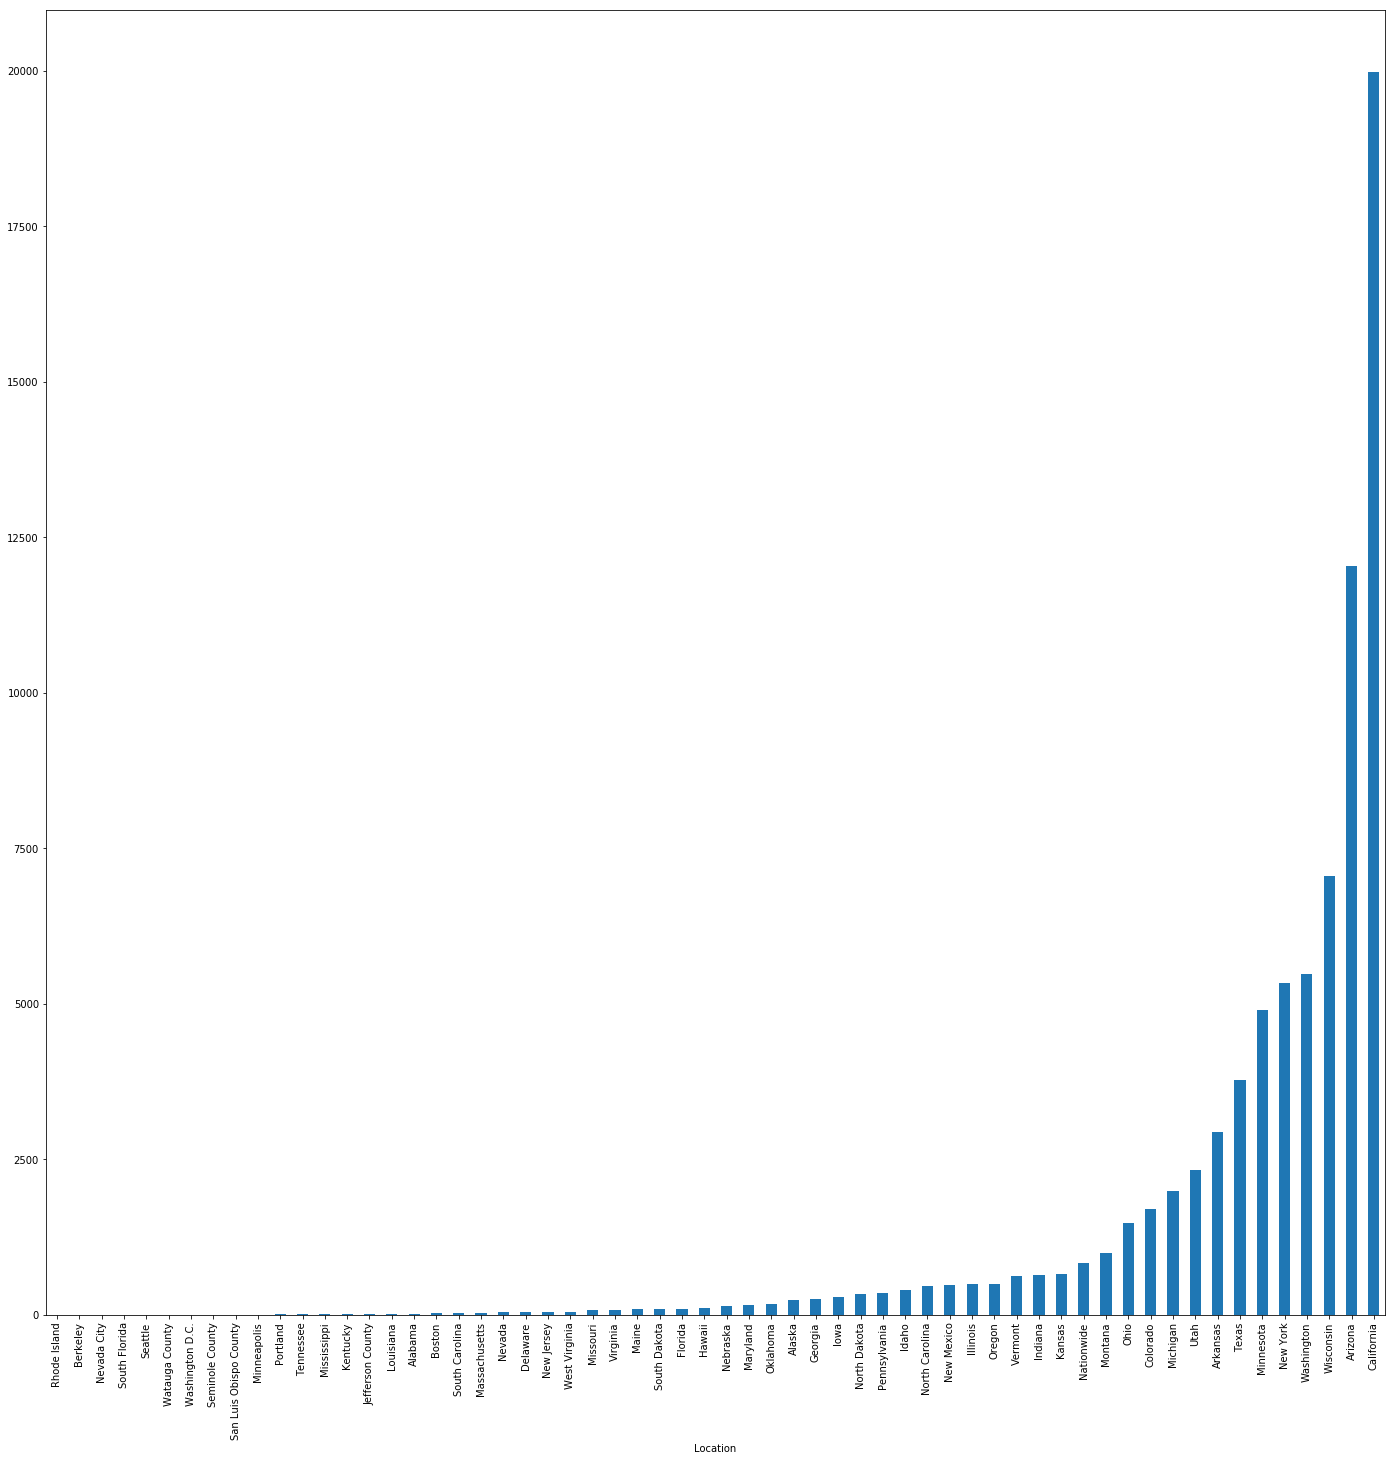

In [33]:
df_outbreaks_USA3.groupby('Location')['Cases'].sum().sort_values().plot(kind='bar', x='Location', y='Cases', figsize=(24,24))

In [34]:
df_outbreaks_USA3.head(1)

,Category,Outbreak,Location,Continent,Lat,Long,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
0,Whooping Cough,Whooping Cough,Pennsylvania,North America,41.53508,-78.52238,2008,32,0,Cluster,"The Herald. ""Local whooping cough outbreak sic...",http://www.sharonherald.com/local/x1208362045/...


In [35]:
# plt.figure(figsize=(10,8))

#             # attacker size in year 298 as the x axis
# plt.scatter(df_outbreaks_USA3['Cases'][df_outbreaks_USA3['Year'] == 2016],
#             # attacker size in year 298 as the y axis
#             df_outbreaks_USA3['Location'][df_outbreaks_USA3['Year'] == 2016],
#             # the marker as
#             marker='o',
#             # the color
#             color='b',
#             # the alpha
#             alpha=0.7,
#             # with size
#             s = 124,
#             # labelled this
#             label='Vac per state')


In [36]:
states = {
        'Alaska': '0',
        'Alabama': '37',
        'Arkansas': '22',
        'Arizona': '23',
        'California': '97',
        'Colorado': '20',
        'Connecticut': '286',
        'District of Columbia': '4088',
        'Delaware': '187',
        'Florida': '145',
        'Georgia': '68',
        'Hawaii': '86',
        'Iowa': '21',
        'Idaho': '7',
        'Illinois': '89',
        'Indiana': '71',
        'Kansas': '14',
        'Kentucky': '43',
        'Louisiana': '41',
        'Massachusetts': '336',
        'Maryland': '238',
        'Maine': '16',
        'Michigan': '67',
        'Minnesota': '26',
        'Missouri': '34',
        'Mississippi': '24',
        'Montana': '2',
        'North Carolina': '98',
        'North Dakota': '4',
        'Nebraska': '9',
        'New Hampshire': '57',
        'New Jersey': '470',
        'New Mexico': '6',
        'Nevada': '10',
        'New York': '162',
        'Ohio': '109',
        'Oklahoma': '22',
        'Oregon': '16',
        'Pennsylvania': '110',
        'Rhode Island': '394',
        'South Carolina': '62',
        'South Dakota': '4',
        'Tennessee': '61',
        'Texas': '40',
        'Utah': '14',
        'Virginia': '66',
        'Vermont': '26',
        'Washington': '41',
        'Wisconsin': '41',
        'West Virginia': '29',
        'Wyoming': '2'
}


In [37]:
df_states = pd.DataFrame(states, index=[0])
df_states = df_states.transpose()


df_states.index.names = ['Date']


In [38]:
df_states.index.names = ['Location']


In [39]:

df_states.reset_index(level=0, inplace=True)


In [40]:
df_states.columns = ['Location', 'Density']

In [41]:
df_outbreaks_USA3 = df_outbreaks_USA3.merge(df_states, left_on='Location', right_on='Location', how='left')

In [42]:
loc_states = {
 (0, 0): 'Alaska', 
 (0, 10): 'Maine',
 (1, 9): 'Vermont',
 (1, 10): 'New Hampshire',
 (2, 0): 'Washington',
 (2, 1): 'Idaho',
 (2, 2): 'Montana', 
 (2, 3): 'North Dakota', 
 (2, 4): 'Minnesota',
 (2, 6): 'Michigan',
 (2, 8): 'New York',
 (2, 9): 'Massachusetts', 
 (2, 10): 'Rhode Island',
 (3, 0): 'Oregon', 
 (3, 1): 'Nevada',
 (3, 2): 'Wyoming', 
 (3, 3): 'South Dakota', 
 (3, 4): 'Iowa', 
 (3, 5): 'Illinois',
 (3, 6): 'Indiana', 
 (3, 7): 'Ohio', 
 (3, 8): 'Pennsylvania',
 (3, 9): 'New Jersey', 
 (3, 10): 'Connecticut', 
 (4, 0): 'California', 
 (4, 1): 'Utah', 
 (4, 2): 'Colorado', 
 (4, 3): 'Nebraska',
 (4, 4): 'Missouri',
 (4, 5): 'Kentucky',
 (4, 6): 'West Virginia',
 (4, 7): 'Virginia', 
 (4, 8): 'Maryland', 
 (4, 9): 'Delaware', 
 (5, 1): 'Arizona',
 (5, 2): 'New Mexico',
 (5, 3): 'Kansas', 
 (5, 4): 'Arkansas',
 (5, 5): 'Tennessee', 
 (5, 6): 'North Carolina', 
 (5, 7): 'South  Carolina',
 (5, 8): 'District of Columbia', 
 (6, 3): 'Oklahoma', 
 (6, 4): 'Louisiana', 
 (6, 5): 'Mississippi',
 (6, 6): 'Alabama',
 (6, 7): 'Georgia',
 (7, 0): 'Hawaii',
 (7, 3): 'Texas', 
 (7, 8): 'Florida'
}


In [43]:
# axes = plt.subplots(8,11)
# for i, row in enumerate(axes):
#     for j, ax in enumerate(row):
#         if (i,j) in loc_states.keys():
#             data = df_outbreaks_USA3.groupby('Location')['cases'].sum
#             data.reset_index(inplace=True)
#             ax  = df_schools_complete.groupby('State/Area')['MMR2 doses(%) 2010_11'].sum().plot


#             state = loc_states[(i,j)]

# plt.show()

In [44]:
# df_outbreaks_USA3.groupby('Location').plot(x='Year', y='Cases')

In [45]:
df_outbreaks_USA3.head()

,Category,Outbreak,Location,Continent,Lat,Long,Year,Cases,Fatalities,Impact Scale,Source Citation,Source,Density
0,Whooping Cough,Whooping Cough,Pennsylvania,North America,41.535080,-78.522380,2008,32,0,Cluster,"The Herald. ""Local whooping cough outbreak sic...",http://www.sharonherald.com/local/x1208362045/...,110
1,Whooping Cough,Whooping Cough,South Dakota,North America,43.969515,-99.901813,2008,67,0,Epidemic,"South Dakota Department of Health. ""INFECTIOUS...",https://doh.sd.gov/statistics/2008Vital/Diseas...,4
2,Mumps,Mumps,Boston,North America,42.358431,-71.059773,2009,9,0,Secondary,"Smith, Stephen. ""9 at Northeastern may have mu...",http://www.boston.com/news/education/higher/ar...,NaN
3,Measles,Measles,Iowa,North America,43.145070,-95.144320,2009,1,0,Isolated,"KTIV. ""Measles reported in Spencer, Iowa area....",http://www.ktiv.com/story/10198872/measles-rep...,21
4,Measles,Measles,Maryland,North America,39.045755,-76.641271,2009,4,0,Secondary,"Carrick, Nathan . ""Fourth case of measles repo...",http://www.gazette.net/stories/04132009/rockne...,238


In [46]:
df_schools_complete['mean'] = df_schools_complete.mean(axis=1)


In [48]:
# df_schools_complete.sort_values(by='mean').dropna().plot(kind='bar', x='State/Area', y='mean', figsize=(16,6), ax.set_ylim(80, 100))

In [49]:
df_outbreaks_USA3.groupby('Location')['Cases'].sum().sort_values()

Location
Rhode Island                  1
Berkeley                      1
Nevada City                   1
South Florida                 1
Seattle                       2
Watauga County                2
Washington D.C.               2
Seminole County               2
San Luis Obispo County        2
Minneapolis                   6
Portland                      9
Tennessee                     9
Mississippi                  10
Kentucky                     15
Jefferson County             15
Louisiana                    20
Alabama                      22
Boston                       23
South Carolina               32
Massachusetts                37
Nevada                       45
Delaware                     50
New Jersey                   52
West Virginia                52
Missouri                     72
Virginia                     85
Maine                        88
South Dakota                 90
Florida                     101
Hawaii                      104
Nebraska                    138

In [50]:
# df_state_pop.set_index

In [51]:
df_merge2 = df_outbreaks_USA3.groupby('Location')['Cases'].sum()

In [52]:
df_merge2 = df_merge2.to_frame()

In [53]:
population = {
        'Alaska': '741894',
        'Alabama': '4863300',
        'Arkansas': '2988248',
        'Arizona': '6931071',
        'California': '39250017',
        'Colorado': '5540545',
        'Connecticut': '3576452',
        'District of Columbia': '681170',
        'Delaware': '952065',
        'Florida': '20612439',
        'Georgia': '10310371',
        'Hawaii': '1428557',
        'Iowa': '3134693',
        'Idaho': '1683140',
        'Illinois': '12801539',
        'Indiana': '6633053',
        'Kansas': '2907289',
        'Kentucky': '4436974',
        'Louisiana': '4681666',
        'Massachusetts': '6811779',
        'Maryland': '6016447',
        'Maine': '1331479',
        'Michigan': '9928301',
        'Minnesota': '5519952',
        'Missouri': '6093000',
        'Mississippi': '2988726',
        'Montana': '1042520',
        'North Carolina': '10146788',
        'North Dakota': '757952',
        'Nebraska': '1907116',
        'New Hampshire': '1334795',
        'New Jersey': '8944469',
        'New Mexico': '2081015',
        'Nevada': '2940058',
        'New York': '19745289',
        'Ohio': '11646273',
        'Oklahoma': '3923561',
        'Oregon': '4093465',
        'Pennsylvania': '12784227',
        'Rhode Island': '1056426',
        'South Carolina': '4961119',
        'South Dakota': '865454',
        'Tennessee': '6651194',
        'Texas': '27862596',
        'Utah': '3051217',
        'Virginia': '8411808',
        'Vermont': '624594',
        'Washington': '7288000',
        'Wisconsin': '5778708',
        'West Virginia': '1831102',
        'Wyoming': '585501'
}



In [54]:
df_population = pd.DataFrame(population, index=[0])





In [55]:
df_population = df_population.transpose()



In [56]:
df_population.reset_index(level=0, inplace=True)

df_population

,index,0
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017
5,Colorado,5540545
6,Connecticut,3576452
7,Delaware,952065
8,District of Columbia,681170
9,Florida,20612439


In [57]:
df_population.columns = ['Location', 'Population']

In [58]:
df_merge2 = df_merge2.reset_index()

In [59]:
df_population = df_population.merge(df_merge2, left_on='Location', right_on='Location', how='left')

In [60]:
df_population.Population = df_population.Population.astype(int)

In [61]:
df_population['cases_pc'] = df_population['Cases'] / df_population['Population']

In [62]:
df_population = df_population.merge(df_schools_complete, left_on='Location', right_on='State/Area', how='left')

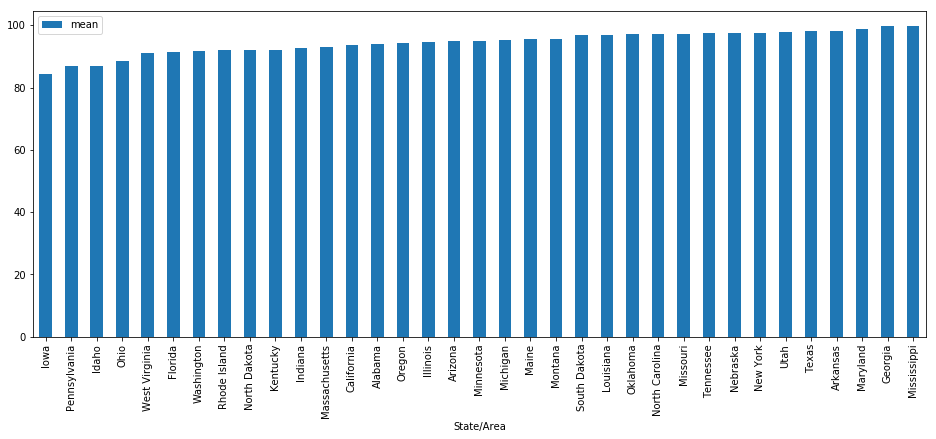

In [63]:
df_population.sort_values(by='mean').dropna().plot(kind='bar', x='State/Area', y='mean', figsize=(16,6))

In [64]:
# JUST TESTS JK

#     for j in df: 

#         ax[plot,0].plot(df["%s" % j])
#         ax[plot,0].set_xlabel('%s' % j)
#         plot=plot+1

#     plt.tight_layout()
#     fig, ax = plt.subplots(len(channels),1, sharex=True, figsize=(50,100), squeeze=False)

# x = df_population.plot(x='cases_pc', y='mean') 
    
# x,y = create_plots()






# data = np.random.rand(3,101)
# data[:,0] = np.arange(2,7,2)
# df = pd.DataFrame(data)

# fig, axes = plt.subplots(nrows=5, ncols=20, figsize=(21,9), sharex=True, sharey=True)
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(df.iloc[:,0], df.iloc[:,i+1])
#     ax.set_xticks(df.iloc[:,0])

# plt.show()
# df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, legend=False)


# for countryname, selection in df.head(1200).groupby("Country"):
#     ax = axes_list.pop(0)
#     selection.plot(x='Year', y='GDP_per_capita', labexl=countryname, ax=ax, legend=False)
#     ax.set_title(countryname)

    
    
    
# fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))
# axes_list = [item for sublist in axes for item in sublist] 

# for countryname, selection in df.head(1200).groupby("Country"):
#     ax = axes_list.pop(0)
#     selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
#     ax.set_title(countryname)
#     ax.tick_params(
#         which='both',
#         bottom='off',
#         left='off',
#         right='off',
#         top='off'
#     )
#     ax.grid(linewidth=0.25)
#     ax.set_ylim((0, 15000))
#     ax.spines['left'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)



In [65]:
# fig, axes = plt.subplots(8,11, figsize=(5,5), sharex=True, sharey=True)
# # def plot():
# for i, row in enumerate(axes):
#     for j, ax in enumerate(row):
#         if (i,j) in loc_states.keys():
#             state = loc_states[(i,j)]
#             ax.plot(kind='bar', x=df_population['mean']) 
# plt.show()

In [66]:
# fig, axes = plt.subplots(8,11, figsize=(12,12), sharex=True, sharey=True)
# def plot(df_population):
#     for i, row in enumerate(axes):
#         for j, ax in enumerate(row):
#             if (i,j) in loc_states.keys():
#                 state = loc_states[(i,j)]
#                 ax.bar(df_population.iloc[:,0], df_population.iloc[:,i+1])
#                 ax.set_xticks(df_population.iloc[:,0])



In [67]:
# df_population.iloc[:,i+1]

In [68]:
# df_population.iloc[:,i+2]

In [69]:
df_population.to_csv("df_population.csv") 

In [70]:
df_population= df_population.set_index('Location')



In [71]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import math


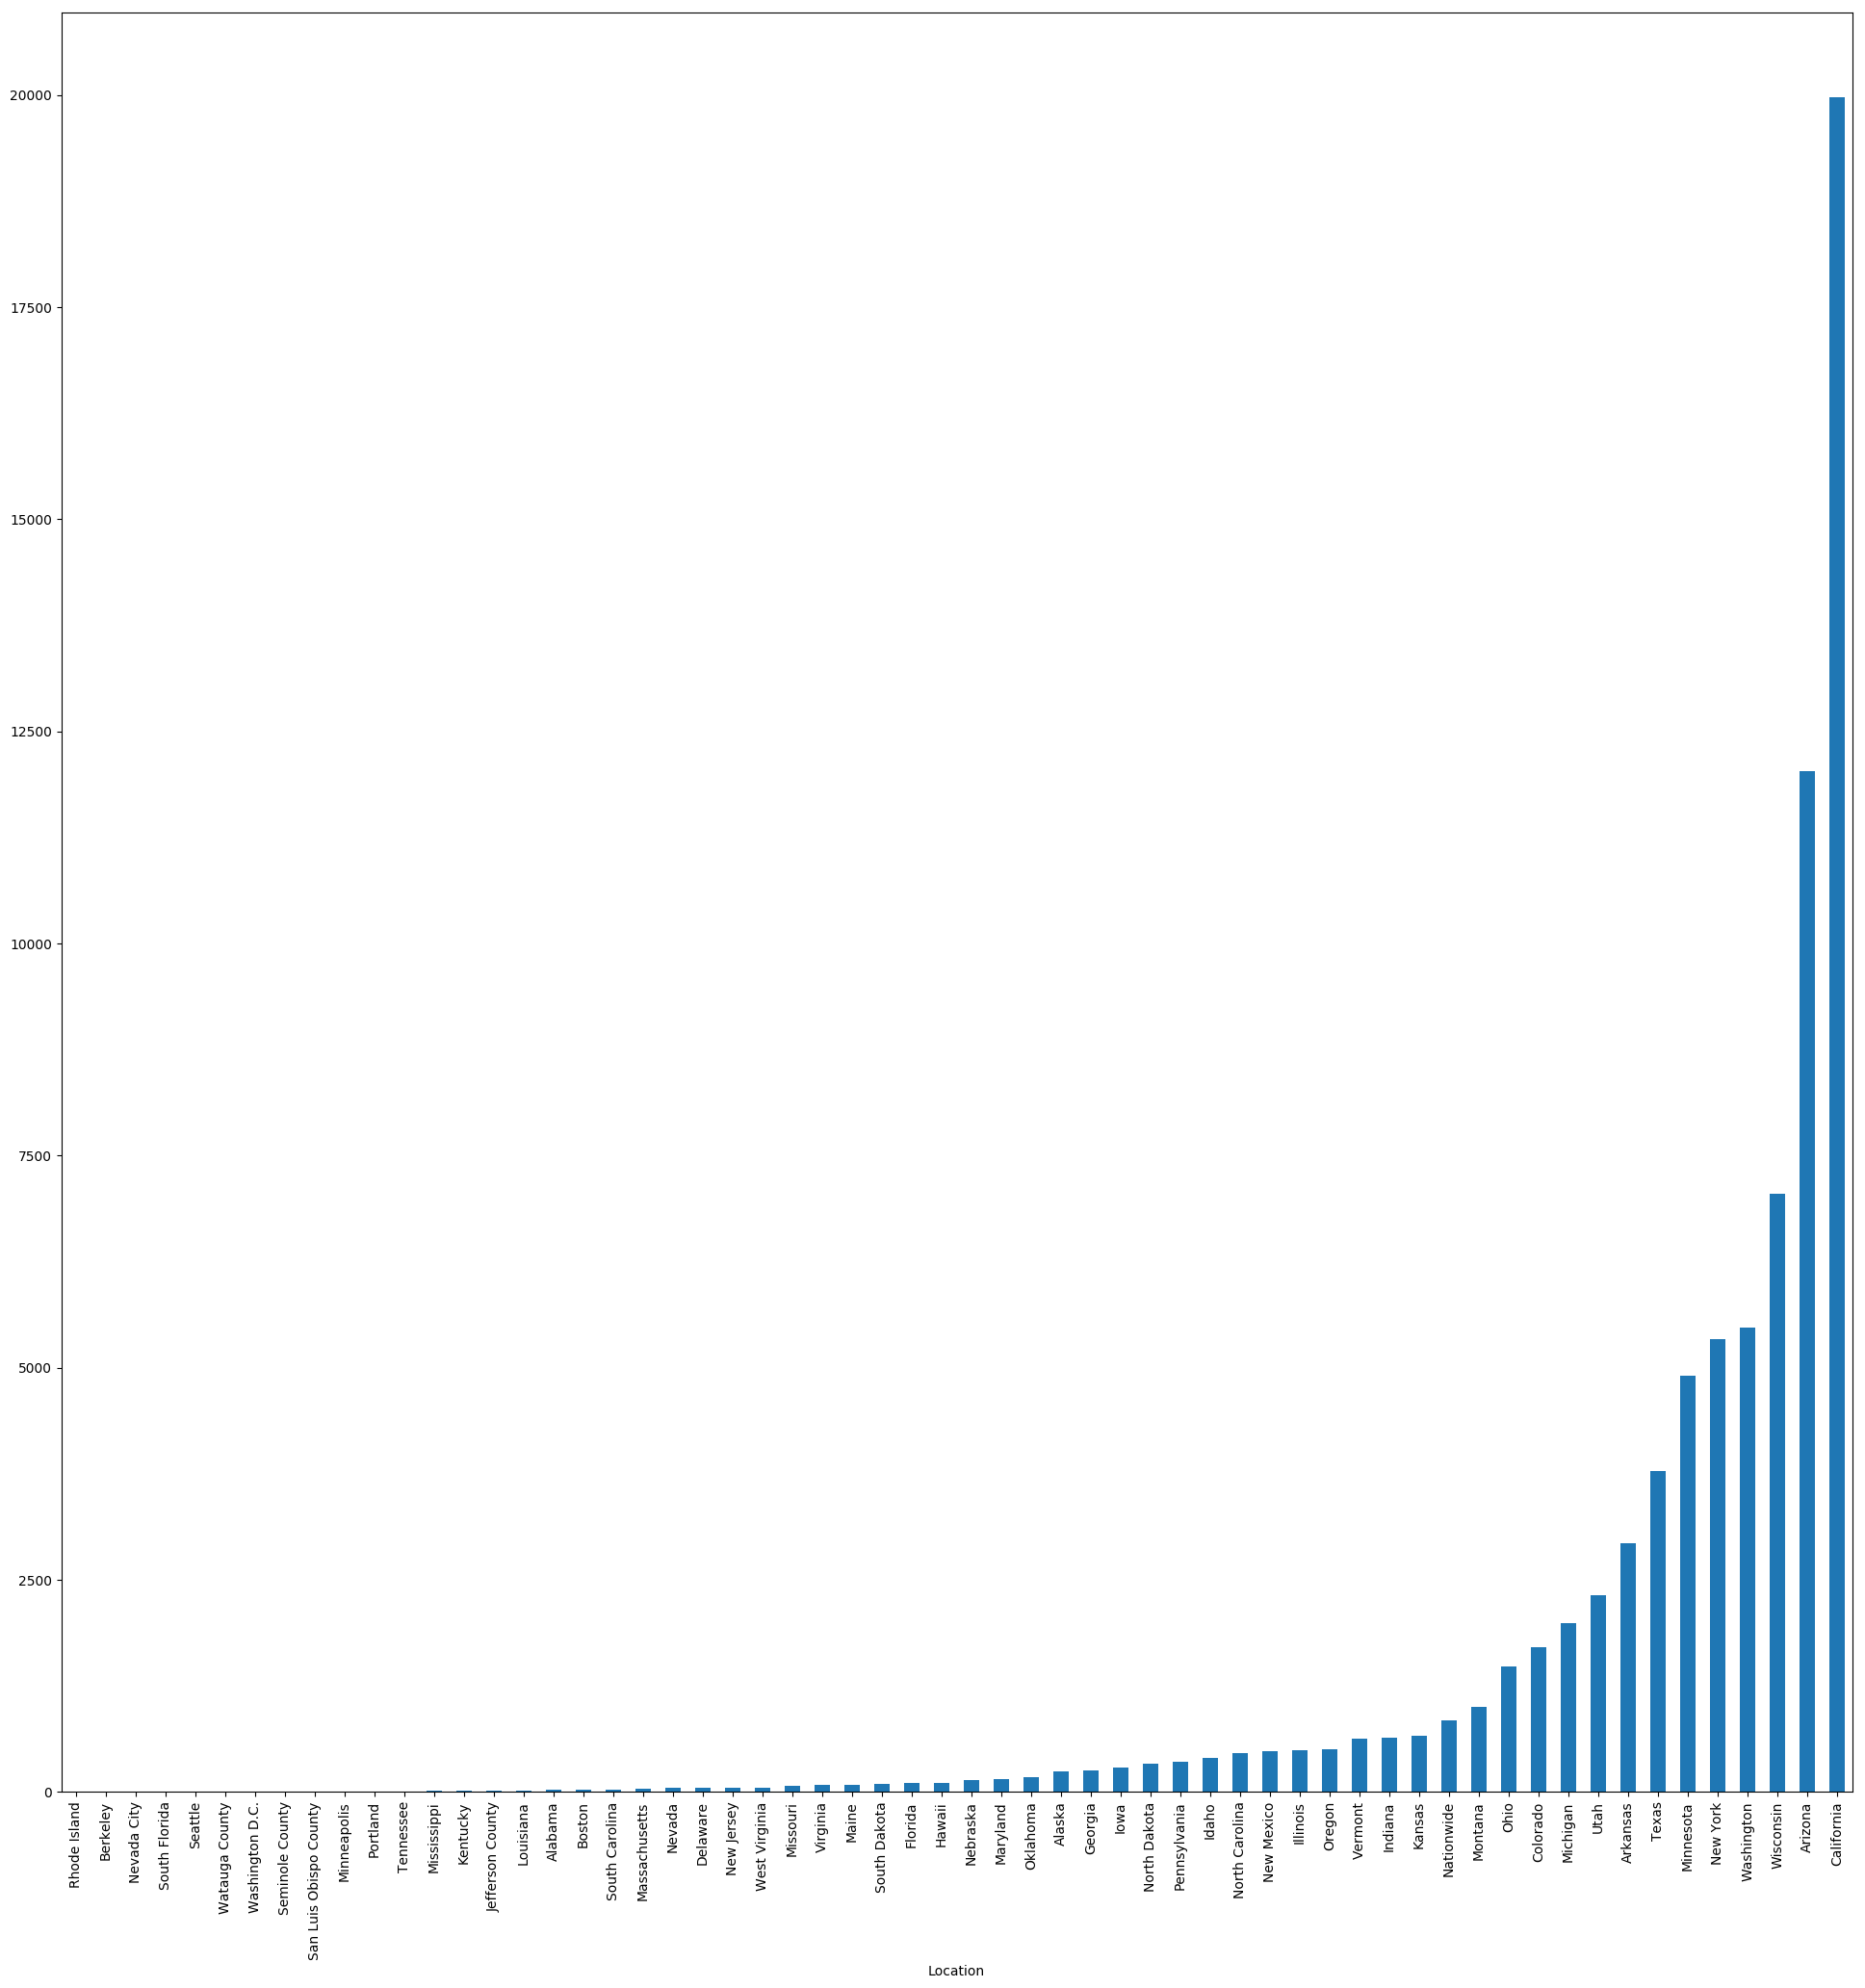

In [72]:
df_outbreaks_USA3.groupby('Location')['Cases'].sum().sort_values().plot(kind='bar', x='Location', y='Cases', figsize=(24,24))

In [73]:
df = df_population



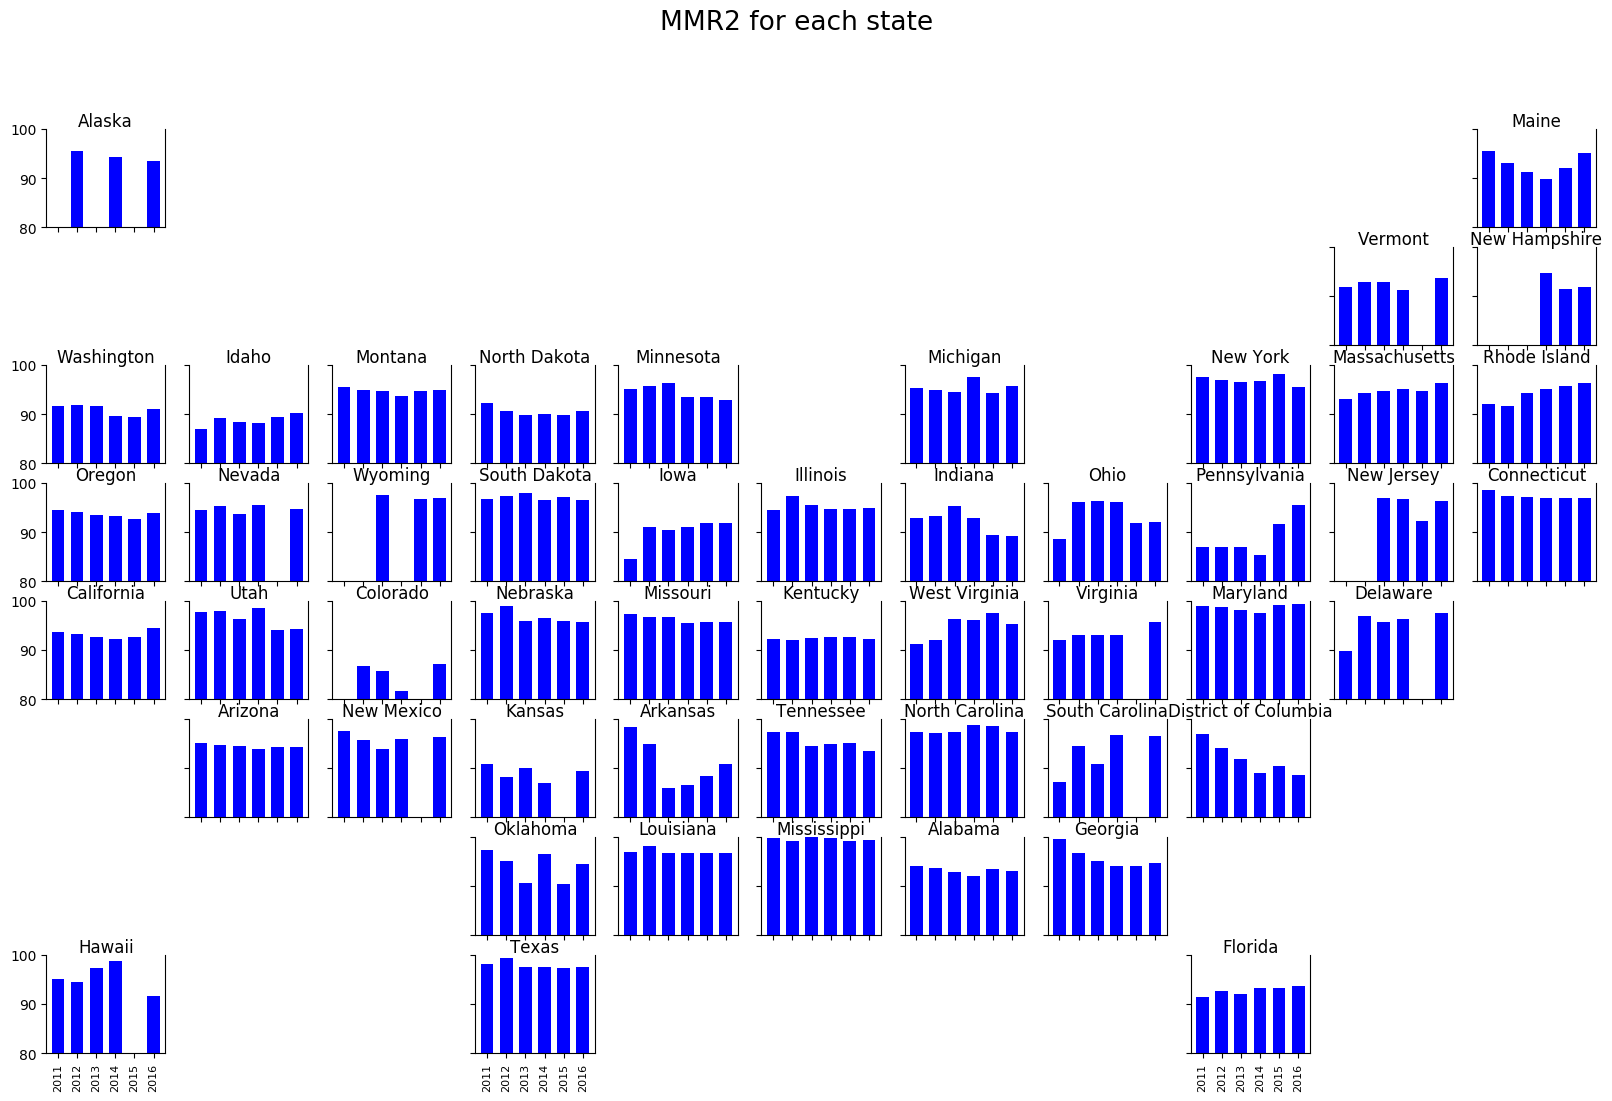

In [74]:
from matplotlib import rcParams

loc_states = {
(0, 0): 'Alaska',
(0, 10): 'Maine',
(1, 9): 'Vermont',
(1, 10): 'New Hampshire',
(2, 0): 'Washington',
(2, 1): 'Idaho',
(2, 2): 'Montana',
(2, 3): 'North Dakota',
(2, 4): 'Minnesota',
(2, 6): 'Michigan',
(2, 8): 'New York',
(2, 9): 'Massachusetts',
(2, 10): 'Rhode Island',
(3, 0): 'Oregon',
(3, 1): 'Nevada',
(3, 2): 'Wyoming',
(3, 3): 'South Dakota',
(3, 4): 'Iowa',
(3, 5): 'Illinois',
(3, 6): 'Indiana',
(3, 7): 'Ohio',
(3, 8): 'Pennsylvania',
(3, 9): 'New Jersey',
(3, 10): 'Connecticut',
(4, 0): 'California',
(4, 1): 'Utah',
(4, 2): 'Colorado',
(4, 3): 'Nebraska',
(4, 4): 'Missouri',
(4, 5): 'Kentucky',
(4, 6): 'West Virginia',
(4, 7): 'Virginia',
(4, 8): 'Maryland',
(4, 9): 'Delaware',
(5, 1): 'Arizona',
(5, 2): 'New Mexico',
(5, 3): 'Kansas',
(5, 4): 'Arkansas',
(5, 5): 'Tennessee',
(5, 6): 'North Carolina',
(5, 7): 'South Carolina',
(5, 8): 'District of Columbia',
(6, 3): 'Oklahoma',
(6, 4): 'Louisiana',
(6, 5): 'Mississippi',
(6, 6): 'Alabama',
(6, 7): 'Georgia',
(7, 0): 'Hawaii',
(7, 3): 'Texas',
(7, 8): 'Florida'
}


def plot_bars(ax, vals):
    N = len(vals)
    x = range(0, N)
    width = 1 / 1.5
    ax.bar(x, vals, width, color="blue")
    ax.set_ylim(80, 100)
    ax.set_xticks(x)
    ax.set_xticklabels(range(2011, 2017), fontsize=8, rotation='vertical')

bar_cols = ['MMR2 doses(%) 2010_11', 'MMR2 doses(%) 2011/12',
       'MMR2 doses(%) 2012/13', 'MMR2 doses(%) 2013/14',
       'MMR2 doses(%) 2014/15', 'MMR2 doses(%) 2015/16']
for col in bar_cols:
    df[col].fillna(0, inplace=True)


rcParams['axes.titlepad'] = 2
fig, axes = plt.subplots(8, 11, figsize=(20, 12), sharex=True, sharey=True)
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if (i, j) in loc_states.keys():
            state = loc_states[(i, j)]
            vals = df[df['State/Area'] == state][bar_cols].values[0]  #just extracts MMR2 data for each state
            plot_bars(ax, vals) #plots bar chart in particular subplot (ax) using state's data
            ax.set_title(state)
            ax.spines['top'].set_visible(False)
        else:
            ax.patch.set_visible(False)
            ax.axis('off')
fig.suptitle("MMR2 for each state", fontsize=19)

fig.savefig('usa.pdf')

In [75]:
df.groupby('Location')['MMR2 doses(%) 2015/16'].sum().sort_values(ascending=False)

Location
Maryland                99.4
Mississippi             99.4
Delaware                97.6
Texas                   97.6
North Carolina          97.3
Connecticut             97.0
Wyoming                 96.9
Louisiana               96.8
South Dakota            96.5
South Carolina          96.5
Massachusetts           96.4
Rhode Island            96.4
New Jersey              96.3
New Mexico              96.2
Michigan                95.7
Missouri                95.7
Virginia                95.7
Nebraska                95.6
New York                95.6
Pennsylvania            95.5
West Virginia           95.2
Maine                   95.1
Montana                 94.9
Illinois                94.9
Nevada                  94.7
Georgia                 94.6
California              94.5
Oklahoma                94.4
Utah                    94.2
Arizona                 94.2
Oregon                  93.9
Florida                 93.7
Vermont                 93.6
Alaska                  93.5
Tenne

In [76]:
df.groupby('Location')['MMR2 doses(%) 2015/16'].sum().sort_values(ascending=False).head(10)

Location
Maryland          99.4
Mississippi       99.4
Delaware          97.6
Texas             97.6
North Carolina    97.3
Connecticut       97.0
Wyoming           96.9
Louisiana         96.8
South Dakota      96.5
South Carolina    96.5
Name: MMR2 doses(%) 2015/16, dtype: object

In [77]:
df.groupby('Location')['MMR2 doses(%) 2015/16'].sum().sort_values(ascending=False).dropna().tail(15)

Location
Alabama                 93.1
Minnesota               92.8
Kentucky                92.2
Ohio                    92.1
New Hampshire           91.9
Iowa                    91.8
Hawaii                  91.6
Washington              91.0
Arkansas                90.8
North Dakota            90.7
Idaho                   90.2
Kansas                  89.4
Indiana                 89.2
District of Columbia    88.5
Colorado                87.1
Name: MMR2 doses(%) 2015/16, dtype: object

In [78]:
df_population.groupby('Location')['cases_pc'].sum().sort_values().head(10)

Location
Rhode Island      9.465878e-07
Tennessee         1.353141e-06
Mississippi       3.345907e-06
Kentucky          3.380682e-06
Louisiana         4.271984e-06
Alabama           4.523677e-06
Florida           4.899954e-06
Massachusetts     5.431768e-06
New Jersey        5.813649e-06
South Carolina    6.450158e-06
Name: cases_pc, dtype: float64

In [79]:
df_population.groupby('Location')['cases_pc'].sum().sort_values().dropna().tail(10)

Location
North Dakota    0.000445
California      0.000509
Washington      0.000751
Utah            0.000761
Minnesota       0.000889
Montana         0.000962
Arkansas        0.000982
Vermont         0.001012
Wisconsin       0.001221
Arizona         0.001737
Name: cases_pc, dtype: float64

In [80]:
df_outbreaks_USA3.head()

,Category,Outbreak,Location,Continent,Lat,Long,Year,Cases,Fatalities,Impact Scale,Source Citation,Source,Density
0,Whooping Cough,Whooping Cough,Pennsylvania,North America,41.535080,-78.522380,2008,32,0,Cluster,"The Herald. ""Local whooping cough outbreak sic...",http://www.sharonherald.com/local/x1208362045/...,110
1,Whooping Cough,Whooping Cough,South Dakota,North America,43.969515,-99.901813,2008,67,0,Epidemic,"South Dakota Department of Health. ""INFECTIOUS...",https://doh.sd.gov/statistics/2008Vital/Diseas...,4
2,Mumps,Mumps,Boston,North America,42.358431,-71.059773,2009,9,0,Secondary,"Smith, Stephen. ""9 at Northeastern may have mu...",http://www.boston.com/news/education/higher/ar...,NaN
3,Measles,Measles,Iowa,North America,43.145070,-95.144320,2009,1,0,Isolated,"KTIV. ""Measles reported in Spencer, Iowa area....",http://www.ktiv.com/story/10198872/measles-rep...,21
4,Measles,Measles,Maryland,North America,39.045755,-76.641271,2009,4,0,Secondary,"Carrick, Nathan . ""Fourth case of measles repo...",http://www.gazette.net/stories/04132009/rockne...,238


In [81]:
df_schools_complete.head()

,State/Area,MMR2 doses(%) 2010_11,MMR2 doses(%) 2011/12,MMR2 doses(%) 2012/13,MMR2 doses(%) 2013/14,MMR2 doses(%) 2014/15,MMR2 doses(%) 2015/16,mean
0,Alabama,94.0,93.6,92.8,92.0,93.5,93.1,94.0
1,Alaska,NaN,95.5,NaN,94.4,NaN,93.5,NaN
2,Arizona,95.0,94.7,94.5,93.9,94.2,94.2,95.0
3,Arkansas,98.3,94.9,85.9,86.5,88.4,90.8,98.3
4,California,93.6,93.2,92.7,92.3,92.6,94.5,93.6


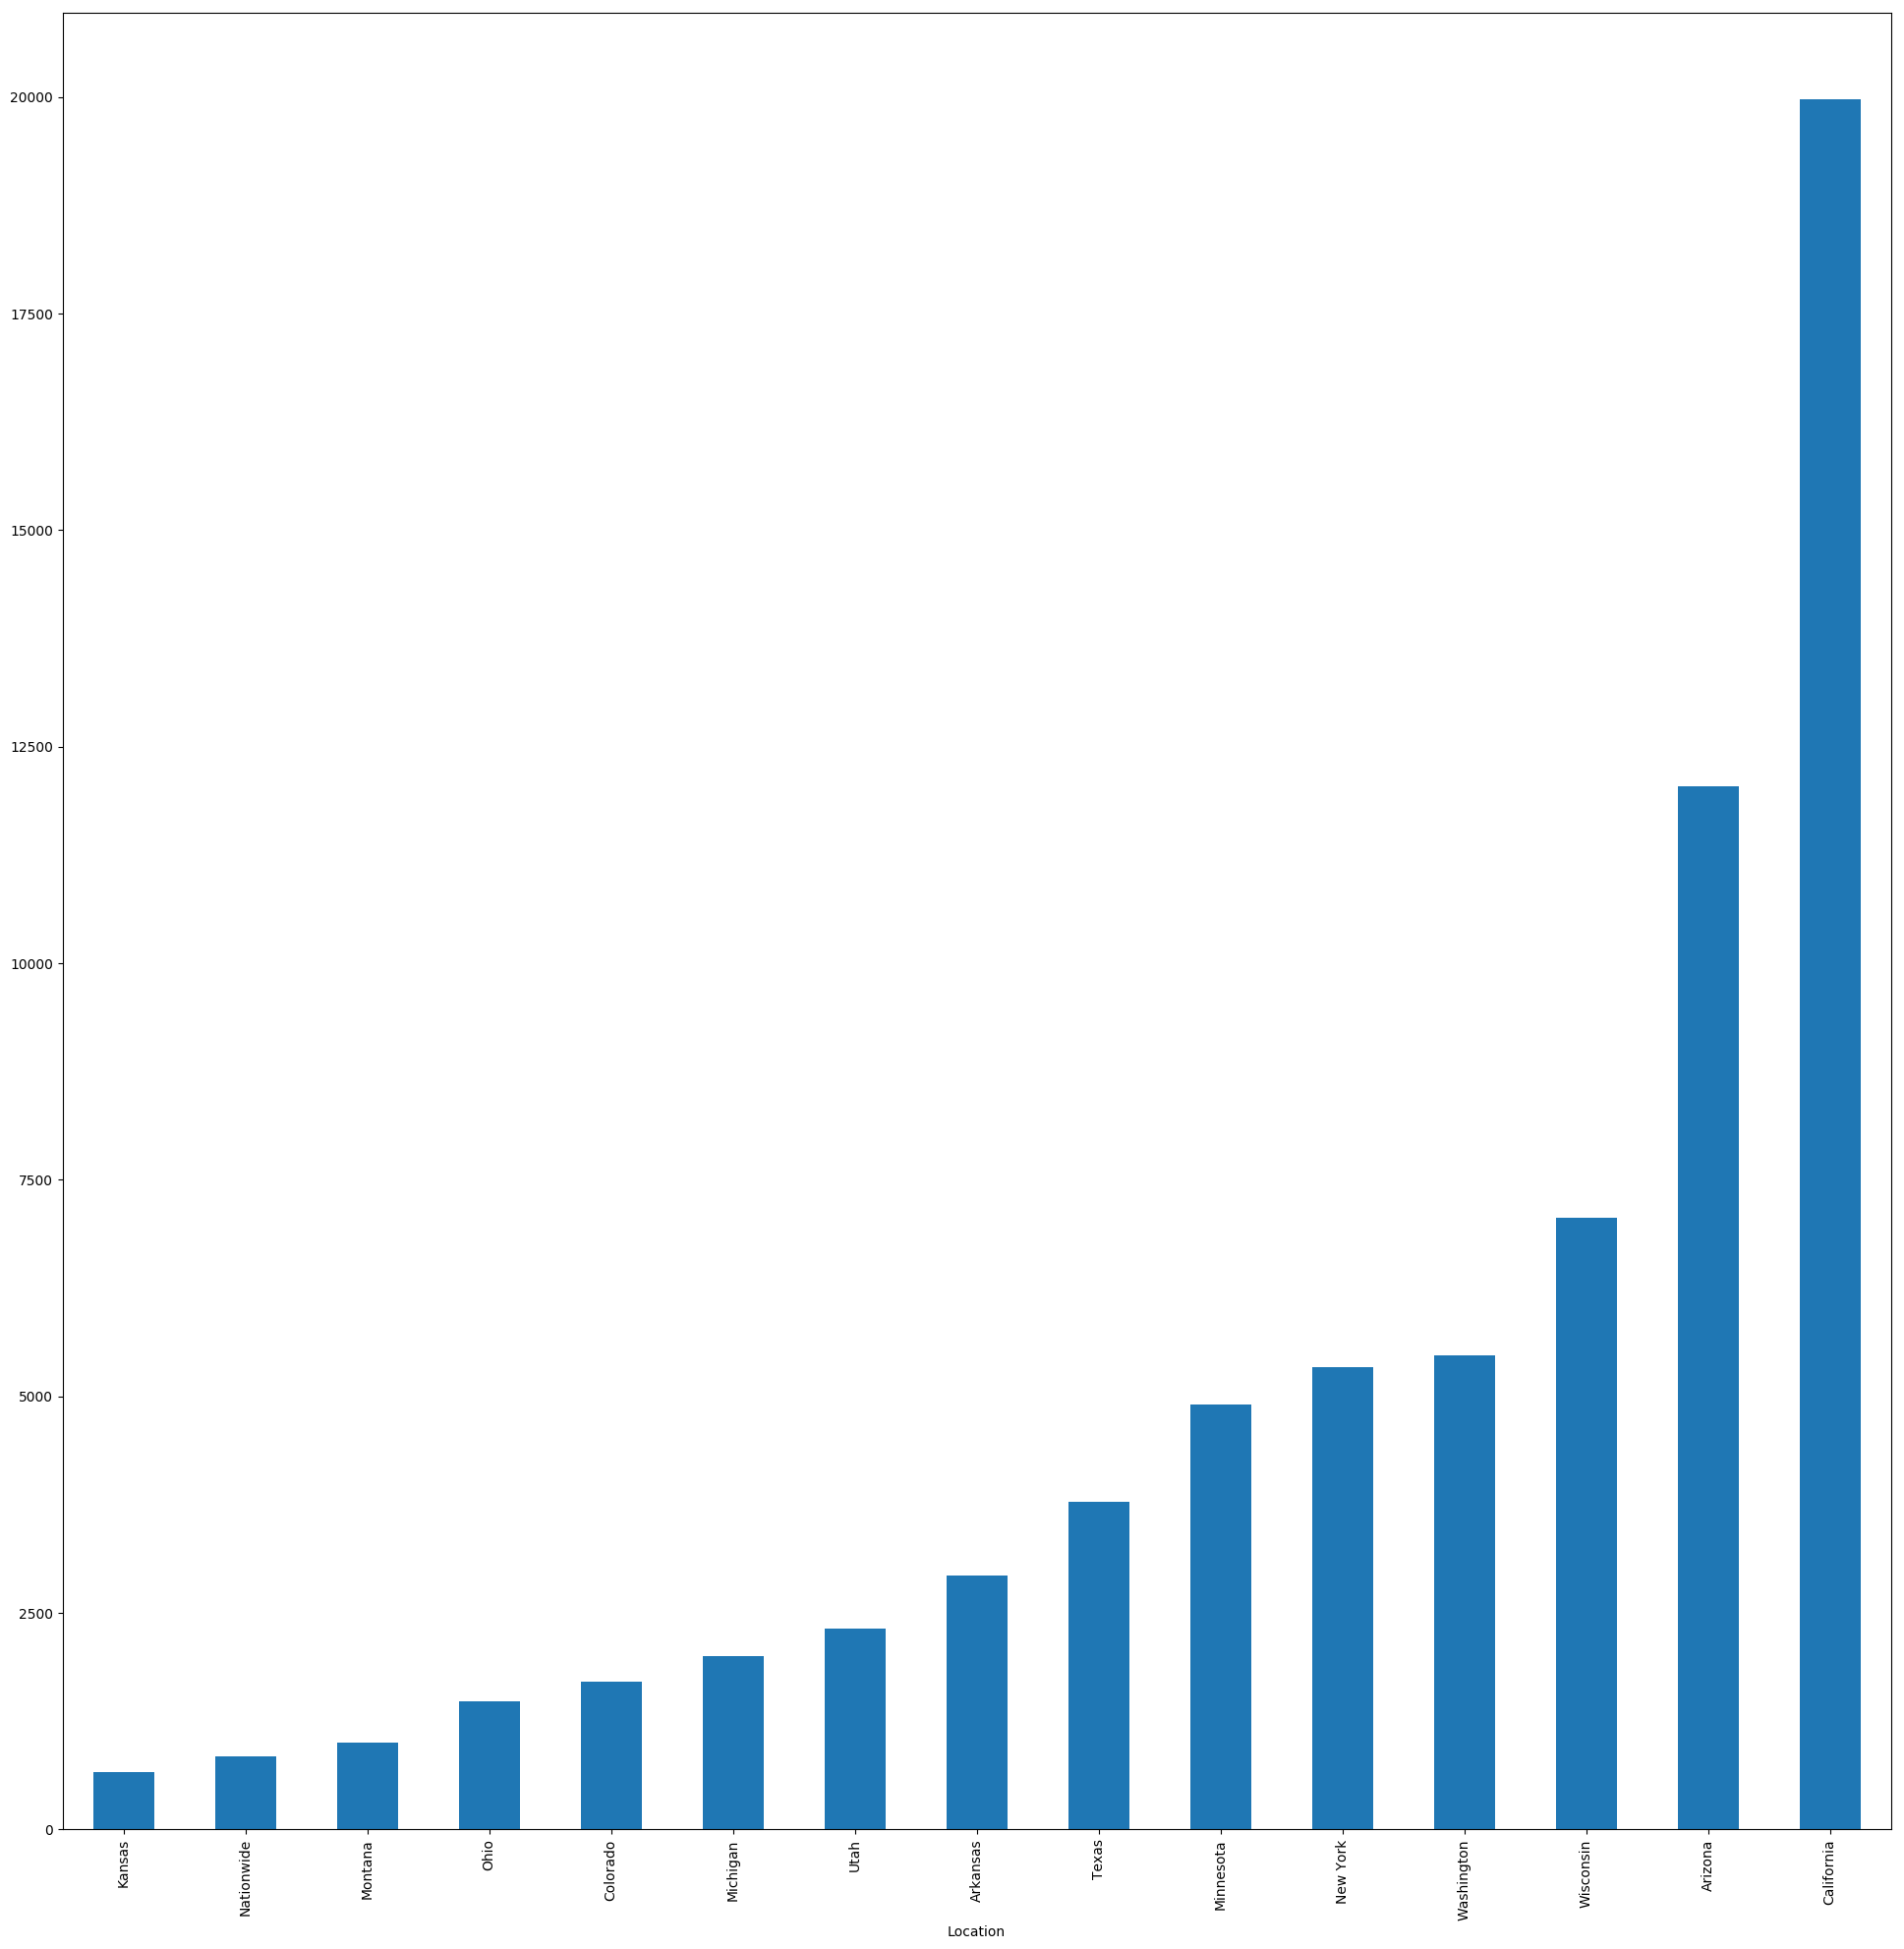

In [82]:
df_outbreaks_USA3.groupby('Location')['Cases'].sum().sort_values().tail(15).plot(kind='bar', x='Location', y='Cases', figsize=(24,24))

In [83]:
df_population['rate_vaccination'] = df_population['mean'] / 100

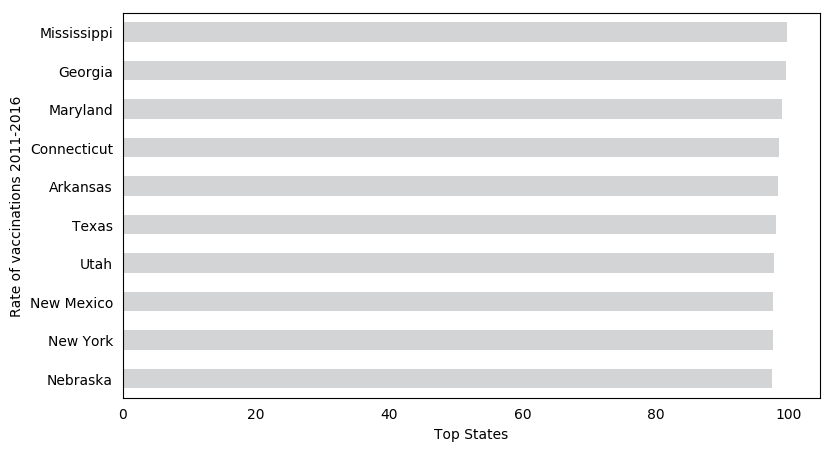

In [84]:
ax = df_population.groupby('Location')['mean'].sum().dropna().sort_values().tail(10).plot(kind='barh', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,5), )
ax.set_xlabel("Top States")
ax.set_ylabel("Rate of vaccinations 2011-2016")
ax.set_autoscaley_on(True)
# ax.set_ylim([95,100])
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', left='off',      # ticks along the bottom edge are off
    top='off')


(80, 100)

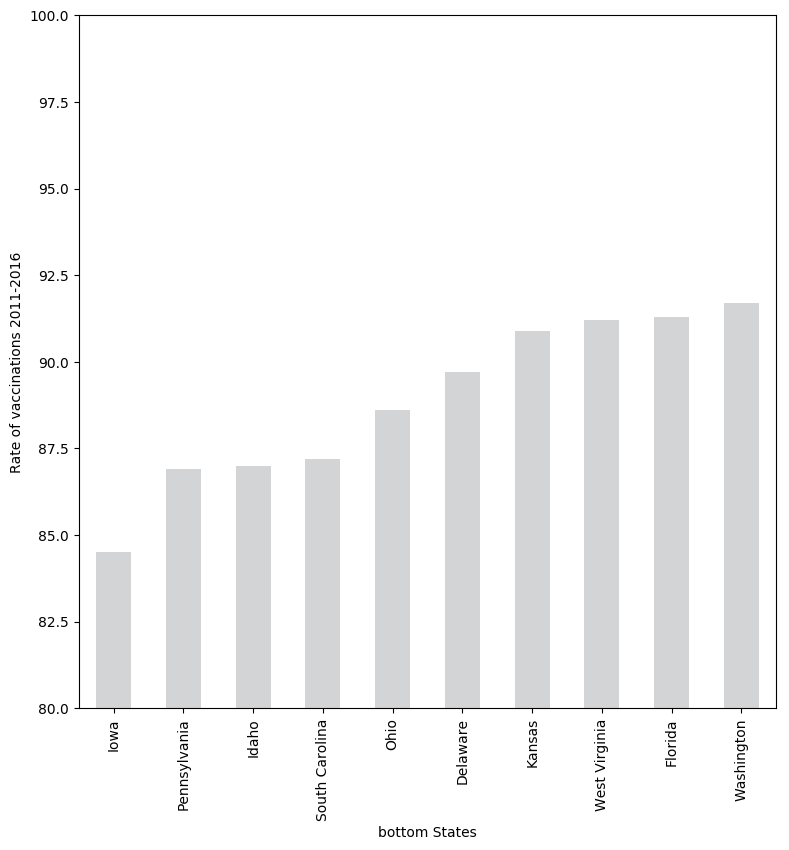

In [85]:
ax = df_population.groupby('Location')['mean'].sum().dropna().sort_values().head(10).plot(kind='bar', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
ax.set_xlabel("bottom States")
ax.set_ylabel("Rate of vaccinations 2011-2016")
ax.set_autoscaley_on(False)

ax.set_ylim([80,100])

In [86]:
import matplotlib.pyplot as plt


In [87]:
from matplotlib.backends.backend_pdf import PdfPages


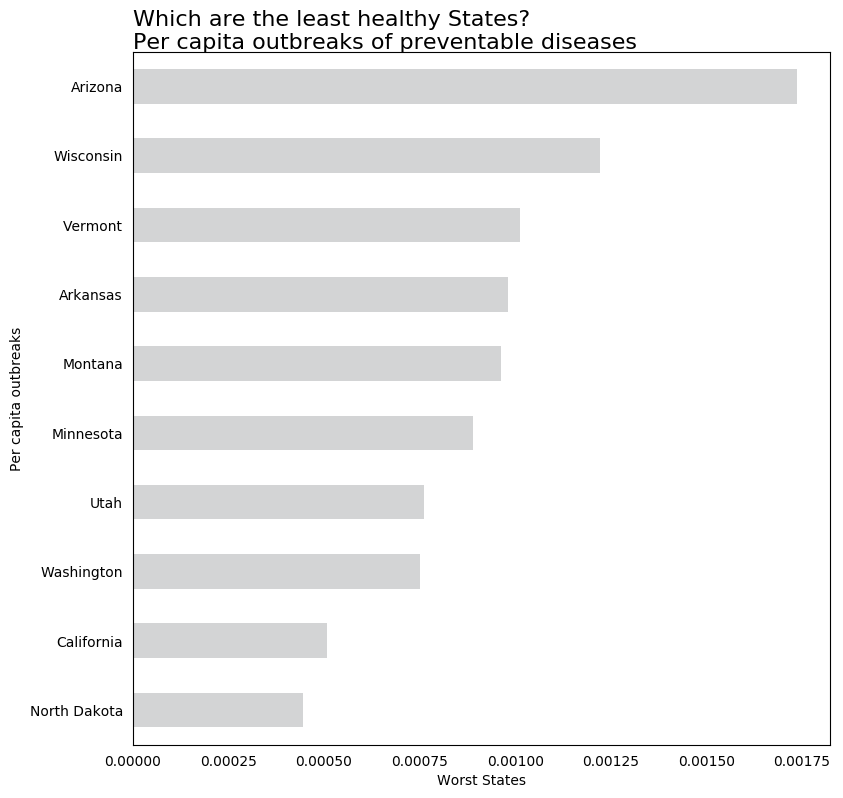

In [88]:
ax = df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values(ascending=True).tail(10).plot(kind='barh', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
ax.set_xlabel("Worst States")
ax.set_ylabel("Per capita outbreaks")
# ax.set_title('From worst to best', loc='left')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', left='off',      # ticks along the bottom edge are off
    top='off')

plt.title('Which are the least healthy States?\nPer capita outbreaks of preventable diseases', fontsize=16, loc='left')


plt.savefig("worst.pdf")



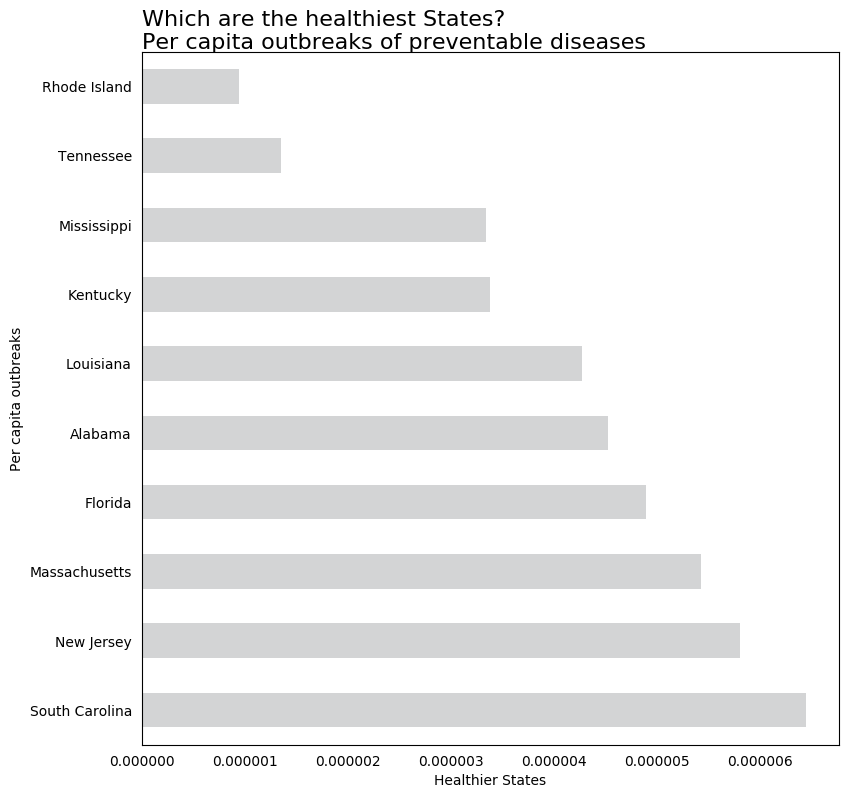

In [89]:
ax = df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values(ascending=False).tail(10).plot(kind='barh', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
ax.set_xlabel("Healthier States")
ax.set_ylabel("Per capita outbreaks")
# ax.set_title('From worst to best', loc='left')


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', left='off',      # ticks along the bottom edge are off
    top='off')


plt.title('Which are the healthiest States?\nPer capita outbreaks of preventable diseases', fontsize=16, loc='left')
# plt.title('Per capita outbreaks of preventable diseases',fontsize=10,loc='left')

plt.savefig("best1.pdf")





In [91]:
df_population.head(1)

,Population,Cases,cases_pc,State/Area,MMR2 doses(%) 2010_11,MMR2 doses(%) 2011/12,MMR2 doses(%) 2012/13,MMR2 doses(%) 2013/14,MMR2 doses(%) 2014/15,MMR2 doses(%) 2015/16,mean,rate_vaccination
Location,,,,,,,,,,,,
Alabama,4863300,22.0,0.000005,Alabama,94.0,93.6,92.8,92.0,93.5,93.1,94.0,0.94


In [92]:
df_outbreaks_top_bottom = df_population[df_population['State/Area'].isin(['South Carolina', 'New Jersey', 'Massachusetts', 'Florida', 'Alabama', 'Louisiana', 'Kentucky', 'Mississippi', 'Tennessee', 'Rhode Island', 'Arizona', 'Wisconsin', 'Vermont', 'Arkansas', 'Montana', 'Minnesota', 'Utah', 'Washington', 'California', 'North Dakota'])]

In [93]:
df_outbreaks_top_bottom.tail()

,Population,Cases,cases_pc,State/Area,MMR2 doses(%) 2010_11,MMR2 doses(%) 2011/12,MMR2 doses(%) 2012/13,MMR2 doses(%) 2013/14,MMR2 doses(%) 2014/15,MMR2 doses(%) 2015/16,mean,rate_vaccination
Location,,,,,,,,,,,,
Tennessee,6651194,9.0,0.000001,Tennessee,97.4,97.3,94.5,94.9,95.1,93.5,97.4,0.974
Utah,3051217,2322.0,0.000761,Utah,97.7,98.0,96.3,98.5,94.0,94.2,97.7,0.977
Vermont,624594,632.0,0.001012,Vermont,91.8,92.9,92.8,91.2,0,93.6,91.8,0.918
Washington,7288000,5473.0,0.000751,Washington,91.7,91.8,91.7,89.7,89.4,91.0,91.7,0.917
Wisconsin,5778708,7056.0,0.001221,Wisconsin,94.2,93.1,92.8,92.6,0,93.2,94.2,0.942


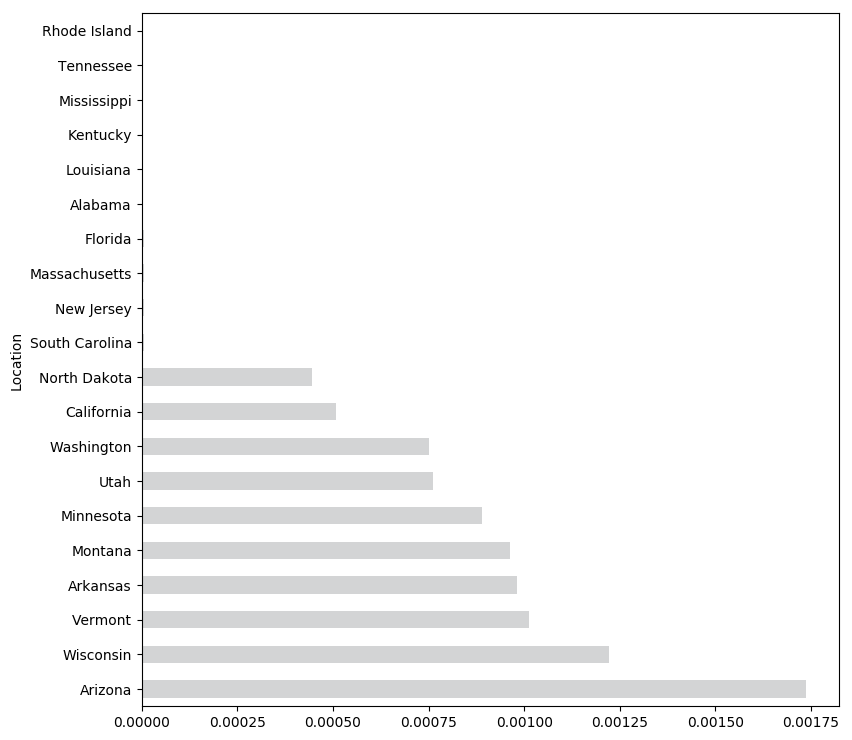

In [94]:
df_outbreaks_top_bottom.groupby('Location')['cases_pc'].sum().dropna().sort_values(ascending=False).plot(kind='barh', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
ax.set_xlabel("Healthier States")
ax.set_ylabel("Per capita outbreaks")

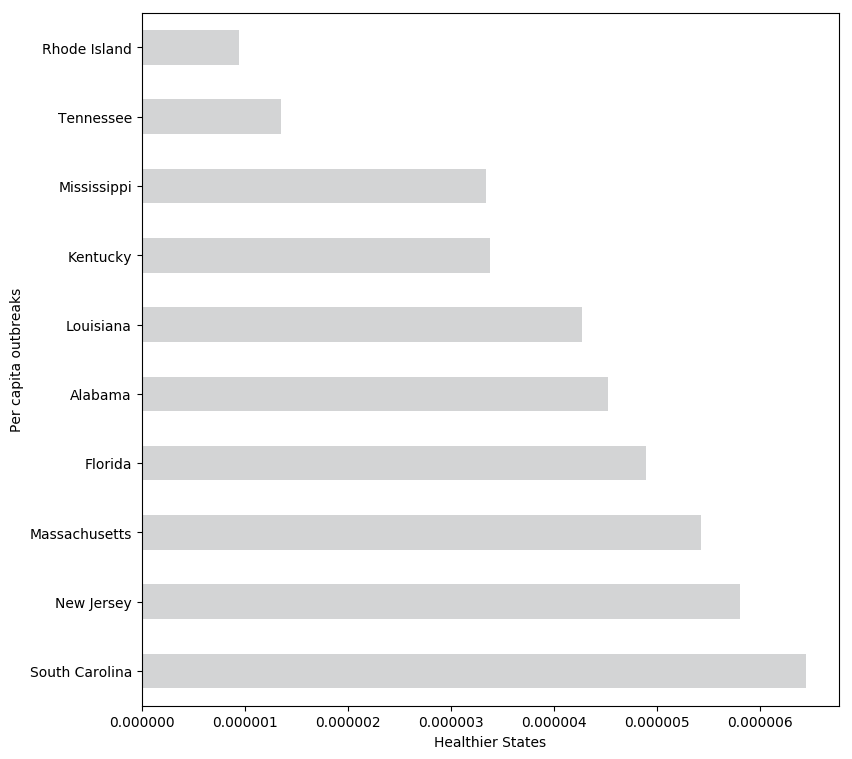

In [95]:
ax = df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values(ascending=False).tail(10).plot(kind='barh', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
ax.set_xlabel("Healthier States")
ax.set_ylabel("Per capita outbreaks")

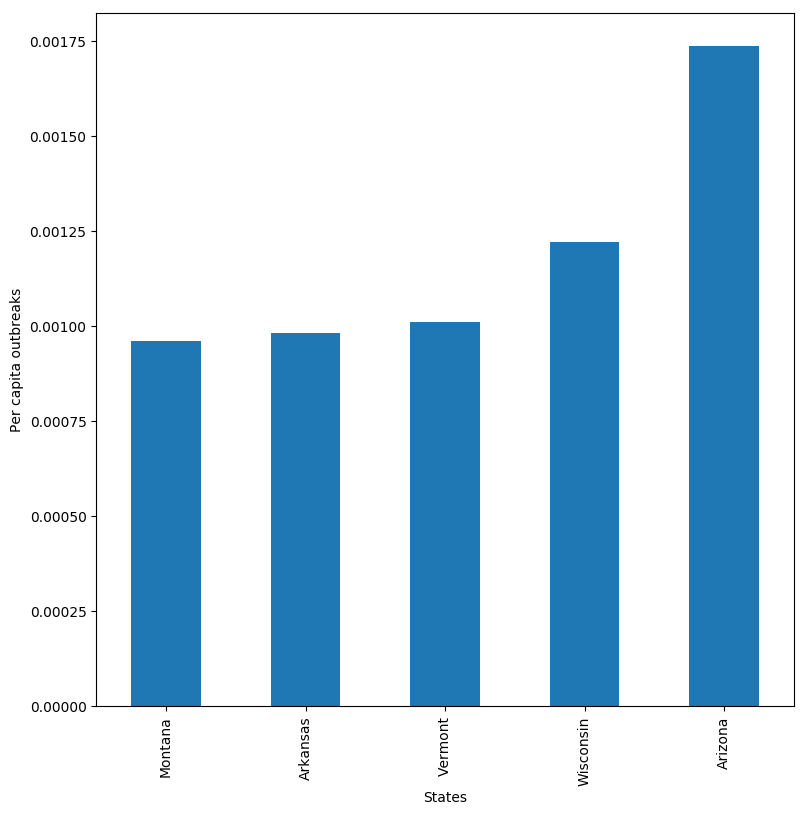

In [96]:
ax = df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values().head().plot(kind='bar', x='Location',color='#d3d4d5', y='cases_pc', figsize=(9,9))
df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values().tail().plot(kind='bar', ax=ax)
ax.set_xlabel("States")
ax.set_ylabel("Per capita outbreaks")




#plt.ylim(min(y_pos)-1, max(y_pos)+1)


In [97]:
df_population.groupby('Location')['cases_pc'].sum().dropna().sort_values().tail().plot(kind='bar', ax=ax)



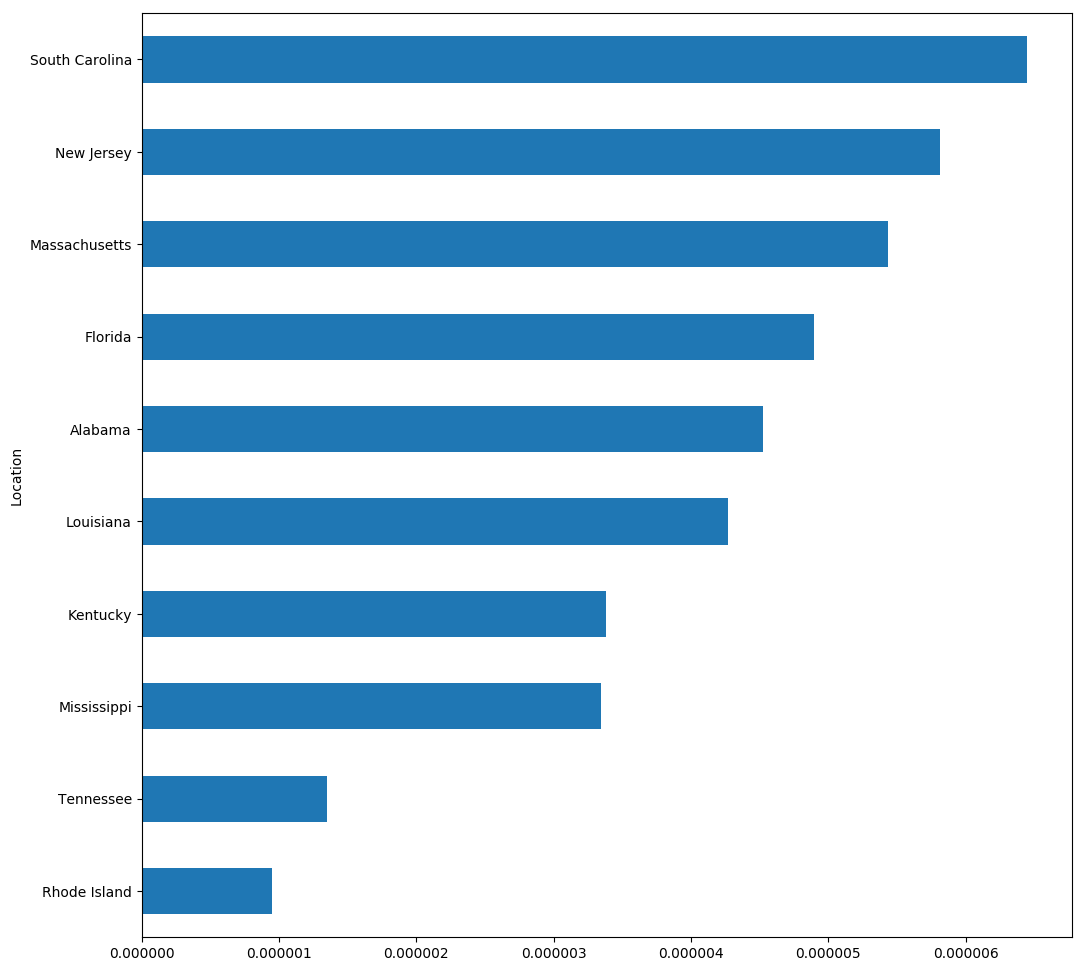

In [98]:
df_population.groupby('Location')['cases_pc'].sum().sort_values().dropna().head(10).plot(kind='barh', figsize=(12,12))

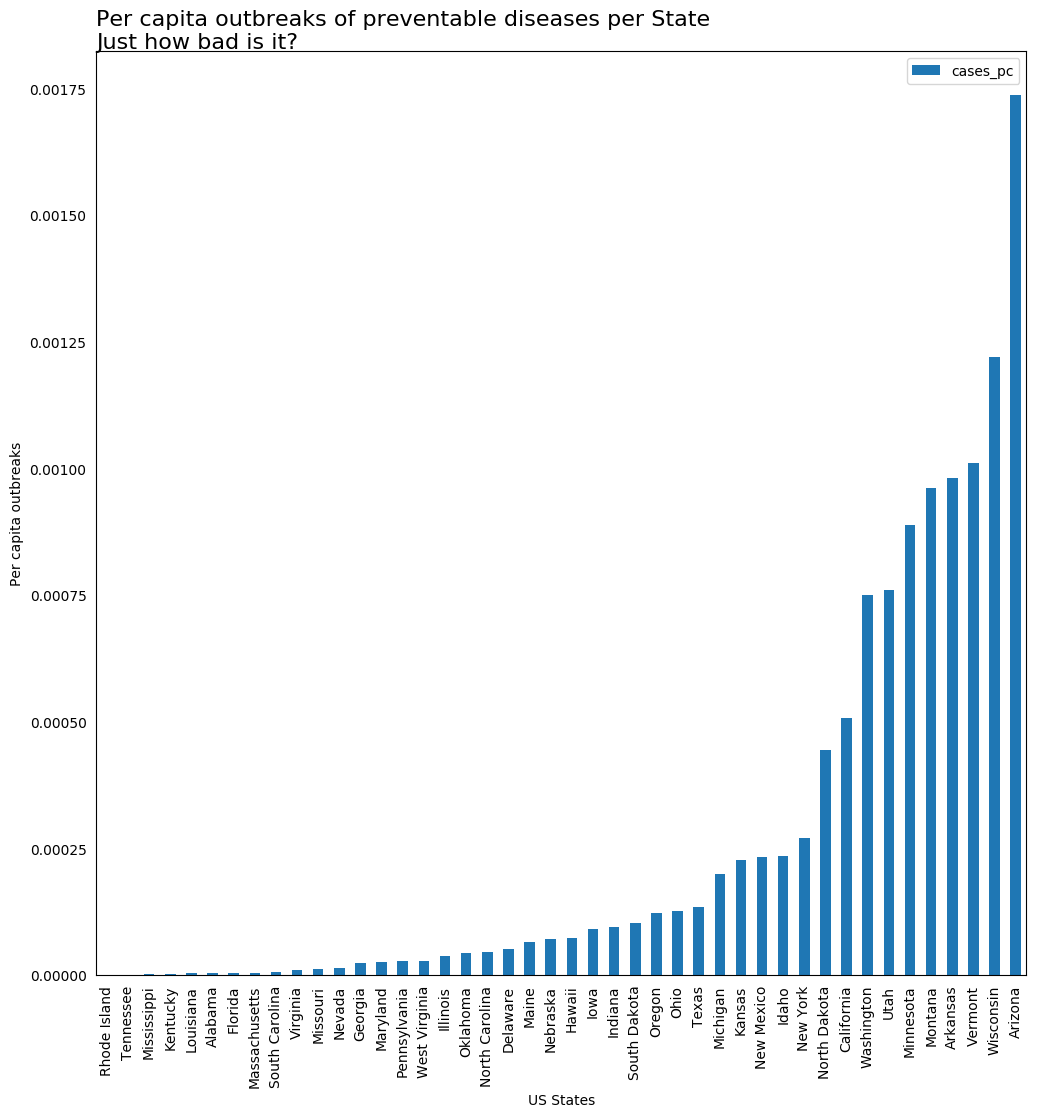

In [100]:
ax = df_population.dropna().sort_values(by='cases_pc').plot(x='State/Area', y='cases_pc', kind='bar', figsize=(12,12))

ax.set_xlabel("US States")
ax.set_ylabel("Per capita outbreaks")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', left='off',      # ticks along the bottom edge are off
    top='off')


plt.title('Per capita outbreaks of preventable diseases per State\nJust how bad is it?', fontsize=16, loc='left')


# plt.savefig("everything.pdf", bbox_inches='tight')

